
# Object-Oriented Programming (Classes)

#### Jack Bennetto, August 8, 2017
(based heavily on Matt Drury's notebook)

Object-oriented programming is about how we *organize* our ideas in code.

Programs are made up of two fundamental, conceptual components:
    
  - Data
  - Algorithms to manipulate the data

So to have an expressive and useful programming language, we need ways to both

  - Create new types of data.
  - Create re-usable algorithms to manipulate that data.

Sometimes the algorithms we need to manipulate data are tied closely to the data itself, and in this case we would like to associate algorithms with specific data structures

### Objectives

  - Give basic examples of objects in python (list and dictionaries)
  - Define object, attribute, and method, and give examples.
  - Create a new datatype using a class.
  - Describe the difference between a class and an object.
  - Describe what `self` is.
  - Add natural behavior to a class with *dunder* methods.

## Objects

An object some piece of data, including code used to manipulate that data. In python (in contrast to some other languages) pretty much everything is an object. We'll talk about that more later.

### Basic Example: Lists

Python `list`s are a very useful type of data structure, and they have lots of associated algorithms.  Let's take a closer look a lists and how they work.

In [1]:
# Q: Why didn't I call it 'l', why didn't I call it 'list'
lst = [1, 2, 2, 3, 4, 4, 4]

# Associated algorithm: count
print(lst.count(2))
print(lst.count(3))

print(lst)

2
1
[1, 2, 2, 3, 4, 4, 4]


The `count` function is associated with the `list` data type.

Functions that are associated to a specific data type in this way are called *methods*.  So we would say

> `count` is a method of the data type `list`

Methods are (generally) called using the `.` notation:

```python
data_element.method(additional_arguments)
```

## Attributes

Some objects have attributes as well, that let us access the data in the object directly. Those are (usually) hidden in some way, and we usually get to everything we need through a method. But to give an example, every object has a `__class__` attribute that show what class it is part of, and most have a `__doc__` attribute that provides information about the how the object works.

In [2]:
print(lst.__class__)

<class 'list'>


In [3]:
print(lst.__doc__)

list() -> new empty list
list(iterable) -> new list initialized from iterable's items


### Pure vs. Impure Methods

Some methods actually *change* the data they operate on:

In [4]:
print(lst)

lst.append(5)

print(lst)

[1, 2, 2, 3, 4, 4, 4]
[1, 2, 2, 3, 4, 4, 4, 5]


Methods which do **not** change the underlying data (`list.count`) are called **pure methods**, methods that *do* change the underlying data (`list.append`) are called **impure methods**.

Changing the data without giving it a new name (or, at the extreme, copying it first) is called **mutating** the data.  Some data types protect against changing the data in place, they are called **immutable types**.

In [5]:
tup = (1, 2, 3)
tup[2] = 4

TypeError: 'tuple' object does not support item assignment

### Magic Methods

Some things that do not look like methods actually are, indexing for example:

In [6]:
print(lst[2])
print(lst.__getitem__(2))

2
2


The `__getitem__` is called a **magic method**.  There are spelled with two underscores on either side of the word, which lead to their other common name: **dunder methods**.  This one would be pronounced "dunder-get-item". While we can call magic methods directly, they are generally called internally by python itself. 

In [13]:
# lst[2] = 100
lst.__setitem__(2, 100)

# lst[2]
print(lst.__getitem__(2))

# len(lst)
print(lst.__len__())

# lst[1:5]
print(lst.__getitem__(slice(1, 5)))

100
8
[2, 100, 3, 4]


## More Advanced Examples

The python standard library has many examples of additional data types.  We will be re-implementing two of the more useful ones, `defaultdict` and `OrderedDict`.

In [16]:
from collections import defaultdict, OrderedDict

### defaultdict

`defaultdict` is a simple but effective alternative to a dictionary.

Recall that with a normal dictionary, attempting to lookup a key that does not exist is an error.

In [17]:
d = {'a': 1, 'b': 2}

d['c']

KeyError: 'c'

A `defaultdict` allows you to specify a default function that will be used to return a value when a non-existent key lookup is attempted.

In [18]:
def default():
    """A function that returns a default value, called when we attempt to
    access a non-existent key in a default dictionary.
    """
    return 0

dd = defaultdict(default, {'a': 1, 'b': 2})

print(dd['a'])
print(dd['c'])
print(dd)

1
0
defaultdict(<function default at 0x10f73f9d8>, {'a': 1, 'b': 2, 'c': 0})


**Note**: In our creation of the `defaultdict` above, the line `dd = defaultdict(int, {'a': 1, 'b': 2})` is more idiomatic.  We chose to write it the way we did above as it makes more explicit what is going on.

**Note**: It's a bit weird to have to pass in a function that returns the default value instead of the default value itself, but this is needed to avoid weird problems arising from mutable objects like lists.  Passing a function guarantee that this will work:

In [20]:
dd = defaultdict(list, {})

print(dd['a'])

dd['a'].append(1)
dd['a'].append(2)
dd['b'].append(1)

print(dd)

[]
defaultdict(<class 'list'>, {'a': [1, 2], 'b': [1]})


A more naive implementation would result in the **same** list being shared by all keys.

### Making Your Own Default Dict

Let's make our own default dictionaries.

**Note:** In practice, we would not do this.  Since the `defaultdict` datatype already exists, there is no benefit in reimplementing it for practical applications.  But it's instructional to see how we could do this if our needs were for something slightly different.

There are two concepts we need

  - A `class` is a template for a new data type.  It contains information on what data is needed to construct the data type, how to store the data internally, and what algorithms can be applied to the data type.
  - An instance of a class is a concrete object of the new data type.
  
A class is a recipe for constructing instances of that class.

#### Example of a Class: defaultdict

`defaultdict` is a class

In [21]:
from inspect import isclass
isclass(defaultdict)

True

Using the class `defaultdict` as a function creates an instance of that class.

In [22]:
dd = defaultdict(lambda: 0, {'a': 1, 'b': 2})
isinstance(dd, defaultdict)

True

Note: The process of using the class itself as a function is called **construction**, and in this context the class is being used as a **constructor**.  The idea is that we are "constructing" a new object whose type is the class.

We usually abbreviate the phrase

> `dd` is an instance of class `defaultdict`.

as

> `dd` is a `defaultdict`.

In this way, `defaultdict` is thought of as a **type** (or datatype).  This is analogous to the `int`s, `float`s, `string`s, etc that we base all our programs on.

#### Creating A Custom Class

The basics of creating a custom class in python is very easy.

In [23]:
class MyClass(object):
    pass  # Do nothing.

The `(object)` means that our class derives (or inherits) from the base class which is called (confusingly) `object`. Most object-oriented languages rely on inheritance, but it's not a big deal in python.

We can create a new instance of the class easily

In [24]:
my_instance = MyClass()

In [25]:
isinstance(my_instance, MyClass)

True

This is a pretty dumb class as it stands, it cant really *do* anything.  To get something useful we have to add data and behavior to our class.

#### How to Store Data in a Class

The first step is to determine what data we need to store.  In this case it's pretty easy, we need

  - The underlying dictionary that we are going to attempt lookups into.
  - The default action to take when a lookup fails.

Let's mimic the way Python's built in `defaultdict` works.  We need to add some functionality to **supply and then store** both of these data elements when we create an instance of the class.  This is done using a special *method*, `__init__`.

**Note:** `__init__` is pronounced *dunder-in-it*.

In [26]:
class MyDefaultDict(object):
    """A personal implementation of a default dictionary."""
    
    def __init__(self, default, dictionary):
        self.default = default
        self.dictionary = dictionary

There's a lot of new concepts in this code, but let's first see how it works.

In [27]:
mdd = MyDefaultDict(lambda: 0, {'a': 1, 'b': 2})
print(mdd.default)
print(mdd.default())
print(mdd.dictionary)

<function <lambda> at 0x10f76f488>
0
{'a': 1, 'b': 2}


When we use a class like a function

```python
my_instance = MyClass()  # <- Called like a function.
```

it is to create *instances of that class*.  

We will often be working with more than one instance of a single class.

In [28]:
mdd = MyDefaultDict(lambda: 0, {'a': 1, 'b': 2})
mdd2 = MyDefaultDict(lambda: 1, {'a': 2, 'b': 3, 'c': 5})

print(mdd.dictionary)
print(mdd2.dictionary)

{'a': 1, 'b': 2}
{'a': 2, 'b': 3, 'c': 5}


Note the important point: **Both** `mdd` and `mdd2` are instances of the **same class**, but they contain **different data**; they are **independent objects of the same type**.


#### The self Placeholder

A statement like

```
self.default = default
```

creates what is known as an **instance variable** or **instance data**.  In this specific line, we attach the `default` function to the instance of the class currently being created.

There are two main ways that `self` is used:

  - References to `self` inside the `__init__` method refer to the object **currently being created**.
  - References to `self` in any other method (see more below) refer to the object used to reference a call to this method.

For example, when we call a method like:

```python
some_object.some_method(an_argument, another_argument)
```

any references to `self` inside the definition of `some_method` will refer to `some_object`.

So our use of self in the `__init__` method

```python
def __init__(self, default, dictionary):
    self.default = default
    self.dictionary = dictionary
```

Is setting up our `MyDefaultDict` objects so that, once created, each instance of `MyDefaultDict` stores both `default` and `dictionary` data.

That all looks great, but we want to add some  functionality. The `dict` class has a bunch of methods; if we want similar functionality we should implement them.

In [29]:
class MyDefaultDict(object):
    """A personal implementation of a default dictionary."""
    
    def __init__(self, default, dictionary):
        self.default = default
        self.dictionary = dictionary
    
    def keys(self):
        return self.dictionary.keys()
    
    def values(self):
        return self.dictionary.values()
    
    def items(self):
        return self.dictionary.items()

In [30]:
mdd = MyDefaultDict(lambda: 0, {'a': 1, 'b': 2})
mdd.keys()

dict_keys(['a', 'b'])

All we're doing here is calling functions on the internal `dictionary` attribute, though we could make methods to do anything we want. You might be thinking that it's a pain to do this for every single method on `dict`, and you're right. One approach is to **inherit** from (or extend) the `dict` class, which would let us get all the functionality without doing all that work, something like

```python
class MyDefaultDict(dict):
    """A personal implementation of a default dictionary."""
    
    def __init__(self, default, dictionary):
        self.default = default
        self.dictionary = dictionary
```

We aren't going to do that, though, since we're more interested in learning stuff . It turns out inheritance isn't that important in python because it doesn't care much about types. 

What about looking up values by keys?

In [31]:
mdd['a']

TypeError: 'MyDefaultDict' object is not subscriptable

#### Addding Methods to Manipulate Data in a Class

To make that work we'll need some magic methods. Let's implement `__getitem__` and `__setitem__`, which will allow us to index into instances of our class like this

```
mdd['a']
# Means the same thing as mdd.__getitem__('a')

mdd['c'] = 3
# Means the same thing as mdd.__setitem__('c', 3)
```

As a first attempt, let's ignore our goal of adding default behaviour, we can add that later on down the line.

In [32]:
class MyDefaultDict(object):
    """A personal implementation of a default dictionary."""
    
    def __init__(self, default, dictionary):
        self.default = default
        self.dictionary = dictionary
        
    def __getitem__(self, key):
        return self.dictionary[key]
    
    def __setitem__(self, key, value):
        self.dictionary[key] = value

Let's test it out.

In [33]:
mdd = MyDefaultDict(default, {'a': 1, 'b': 2})

print(mdd['a'])
print(mdd['b'])

mdd['c'] = 3

print(mdd.dictionary)

mdd['foo']

1
2
{'a': 1, 'b': 2, 'c': 3}


KeyError: 'foo'

#### Adding the Special Default Behaviour

Now lets add in the special behavior on our indexing, we want to return the default value when an attempt is made to access a key that does not exist in the dictionary.

In [34]:
class MyDefaultDict(object):
    """A personal implementation of a default dictionary."""
    
    def __init__(self, default, dictionary):
        self.default = default
        self.dictionary = dictionary
        
    def __getitem__(self, key):
        if key in self.dictionary:
            return self.dictionary[key]
        else:
            self.dictionary[key] = self.default()
            return self.dictionary[key]
    
    def __setitem__(self, key, value):
        self.dictionary[key] = value

Now the whole thing works as intended.

In [35]:
mdd = MyDefaultDict(default, {'a': 1, 'b': 2})

print(mdd['a'])
print(mdd['b'])
print(mdd['c'])
print(mdd.dictionary)

1
2
0
{'a': 1, 'b': 2, 'c': 0}


#### Adding Other Dict-y Things

A few things that should work for dictionaries still don't work for our new datatype.

In [36]:
len(mdd)

TypeError: object of type 'MyDefaultDict' has no len()

Additionally, code like

```python
'c' in mdd
```

and

```python
for key in mdd:
    print key, mdd[key]
```

will cause an infinite loop, due to a design error (at least, in the author's opinion) in Python itself.

Let's fix that with more magic methods.

In [37]:
class MyDefaultDict(object):
    """A personal implementation of a default dictionary."""
    
    def __init__(self, default, dictionary):
        self.default = default
        self.dictionary = dictionary
        
    def __getitem__(self, key):
        if key in self.dictionary:
            return self.dictionary[key]
        else:
            return self.default()
    
    def __setitem__(self, key, value):
        self.dictionary[key] = value
        
    def __len__(self):
        return len(self.dictionary)
        
    def __contains__(self, key):
        return key in self.dictionary
    
    def __iter__(self):
        for key in self.dictionary:
            yield key

We have a few new methods:

  - `__len__` allows our datatype to support calls to `len`.
  - `__contains__` allows our datatype to support the `in` keyword.
  - `__iter__` allows our datatype to support iteration, i.e., for loops.  The `yield` keyword here is new, and it is a powerful feature of python you will see often.  You should find some time to read about it [here](http://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do-in-python).

Let's try out our new features.

In [39]:
mdd = MyDefaultDict(lambda: 0, {'a': 1, 'b': 2})

print('a' in mdd)

for key in mdd:
    print(key, mdd[key])

True
a 1
b 2


#### Non-Magic Methods

It's worth repeating that not all methods are magic.  Really, most aren't, and most classes that do have magic methods will have plenty of non-magic methods as well.

### OrderedDict

The `OrderedDict` type is a dictionary that remembers the order that keys are added.  While a basic dictionary has no order - iterating over a regular dictionary will access the key, values in a random order, iterating through a `OrderedDict` will access the keys in the same order that they were added.

Your task is to **implement an ordered dictionary**.  Here are some questions to ask yourself:

  - What data will you store on each instance.  Clearly you need a `dictionary`, just like in `defaultdict`.  How are you going to remember the order that keys were added to the dictionary?
  - What methods will you need to implement.  Which one is the important one, i.e., the one that adds the new and interesting behavior?
  - What happens if you add a key twice?  This is an edge case, which your final implementation should account for.


# Afternoon Lecture

## An aside on theory

Object-oriented programming is generally described as having three pillars. So far we've been talking about the first: **encapsulation**. This is the idea that access to the data in an object is limited to its methods.

We haven't explicitly mentioned the second, **polymorphism**, but we've been talking about as we discussed difference types of dictionaries. All these classes behave in similar ways, and we can pass them into functions that expect dictionaries and they will work as they should. Python functions don't check the types of their parameters; as long as they have the right methods they will work okay. This approach is sometimes known as **duck typing**: if it looks like a duck and quacks like a duck then it's a duck.

The third pillar of object-oriented programming is **inheritance**. Most languages handle polymorphism by having one class inherit from another, and objects of the derived class can be used like those of the original class. We can do that in python, and considered doing that above with the MyDefaultDict class, but because python doing care about the types of objects being passed to functions it isn't that important to python.

### Example: scipy distribution functions

Suppose you want to choose a bunch of points from a normal distribution. You might think you'd just use a function, but this is a great example of object-oriented programming.

In [41]:
from scipy import stats
dist = stats.norm(1,2)

We've created an object that represents a normal distribution with a mean of 1 and standard deviation of 2, and it has a method to generate **r**andom **v**alue**s** (`rvs`).

In [43]:
print(dist.rvs(10))

[ 3.08948805  3.15150547 -2.15873518  2.12705477 -3.83691962 -1.92741212
  1.12642328  0.27349882 -0.23013546  3.0551735 ]


Even better, it has a whole bunch of other methods as well, so we can get the mean and variance from it:

In [44]:
print(dist.mean())
print(dist.var())

1.0
4.0


Or calculate the quantile function at 97.5%:

In [45]:
print(dist.ppf(.975))

4.91992796908


Or even plot the probability distribution function:

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

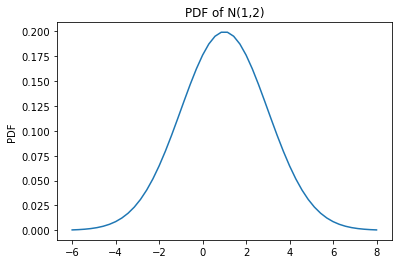

In [47]:
fig, ax = plt.subplots()

x = np.linspace(-6, 8)
ax.plot(x, dist.pdf(x))
ax.set_ylabel('PDF')
ax.set_title('PDF of N(1,2)')

But the really great thing is (and this is **polymorphism**), we can create objects for pretty much any distribution we can think of and they all behave in exactly the same way.

Over the course of the class we'll encounter a number of other types of objects. Other than the ones in standard libraries (like `defaultdict`), the main ones we use are

 * `array`, in numpy
 * `DataFrame` and `Series`, in `pandas`
 * various classifier, regressor, and transformer objects, in `sklearn`
 * `axis`, in `matplotlib`
